In [10]:
# Inmteractive EDA with passwords

In [ ]:
# Tags
interactive EDA, password

In [ ]:
# References

In [1]:
import getpass

import ipywidgets as widgets
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import tab_data, interactive_segment_numeric_by_categoricals, segment_numeric_by_categoricals

In [2]:
# Load data
df = pd.read_csv('data/russia_alcohol.csv')

In [3]:
# Quick check
df.sample(5)

,year,region,wine,beer,vodka,champagne,brandy
1113,2011,Republic of Buryatia,7.31,39.05,13.58,0.77,0.24
1523,2015,Chelyabinsk Oblast,4.80,43.60,4.40,1.40,0.50
1140,2011,Lipetsk Oblast,6.48,77.72,8.85,1.32,0.45
1314,2013,Moscow,8.80,92.50,16.00,5.10,1.70
123,1999,Republic of Mordovia,1.40,15.20,11.20,0.20,0.10


In [ ]:
# Simple widgets

In [8]:
user = getpass.getpass(prompt='User: ', stream=None)

User:  ····


In [7]:
password = getpass.getpass(prompt='Password: ', stream=None)

Password:  ······


In [4]:
# Quick example multiple dropdowns 
env = widgets.Dropdown(
    options=['acc', 'prd'],
    value='acc',
    description='env:',
    disabled=False,
)

agent = widgets.Dropdown(
    options=['pipeline_rest_lam', 'direct_ingestion'],
    value='pipeline_rest_lam',
    description='agent:',
    disabled=False,
)

box = widgets.Box(children=[env, agent])
box

Box(children=(Dropdown(description='env:', options=('acc', 'prd'), value='acc'), Dropdown(description='agent:'…

In [41]:
print(env.value)
print(agent.value)

acc
pipeline_rest_lam


In [11]:
# Dropdown for selecting columns and nr of samples

columns = widgets.SelectMultiple(
    options=df.columns,
    description='columns:',
    disabled=False,
)

samples = widgets.IntText(
    value=5,
    description='Number of samples:',
    disabled=False
)

box = widgets.Box(children=[columns, samples])
box

Box(children=(SelectMultiple(description='columns:', options=('year', 'region', 'wine', 'beer', 'vodka', 'cham…

In [70]:
df[list(columns.value)].sample(samples.value)

,region
583,Udmurt Republic
604,Vladimir Oblast
1188,Yamalo-Nenets Autonomous Okrug
1029,Vladimir Oblast
673,Chelyabinsk Oblast
125,Moscow Oblast


In [12]:
# Dropdown for selecting columns and nr of samples with on change syncronised
import ipywidgets as widgets

from IPython.display import display
from IPython.display import clear_output

box = widgets.Box(children=[columns, samples])
out = widgets.Output()

def on_value_change(change):
    with out:
        clear_output()
        display(df[list(columns.value)].sample(samples.value))
        

columns.observe(on_value_change, names='value')
samples.observe(on_value_change, names='value')

display(box, out)

Box(children=(SelectMultiple(description='columns:', options=('year', 'region', 'wine', 'beer', 'vodka', 'cham…

Output()

In [ ]:
# Distribution of categorical features

In [94]:
df.select_dtypes(include='object').columns

Index(['region'], dtype='object')

In [95]:
df.describe(include='object')

,region
count,1615
unique,85
top,Republic of Adygea
freq,19


In [13]:
# Segment the target variable by categorical features

# transform zear to str
df['year'] = df['year'].astype(str)
interactive_segment_numeric_by_categoricals(df)

Output()

In [ ]:
# Miscellous

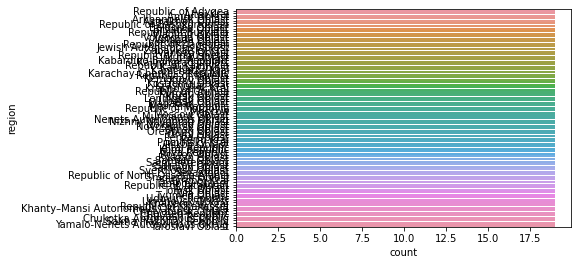

In [7]:
sns.countplot(y=df.region, data=df.wine)
plt.show()

[array(['year', 'region'], dtype=object)]
year
['1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007']


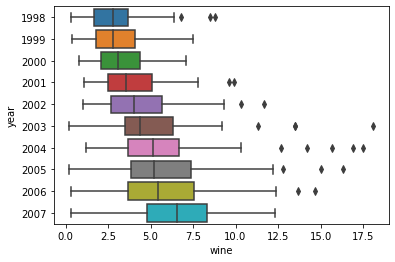

['2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016']


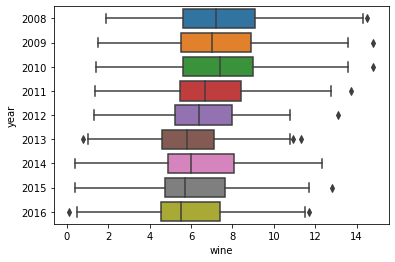

region
['Republic of Adygea' 'Altai Krai' 'Amur Oblast' 'Arkhangelsk Oblast'
 'Astrakhan Oblast' 'Republic of Bashkortostan' 'Belgorod Oblast'
 'Bryansk Oblast' 'Republic of Buryatia' 'Vladimir Oblast']


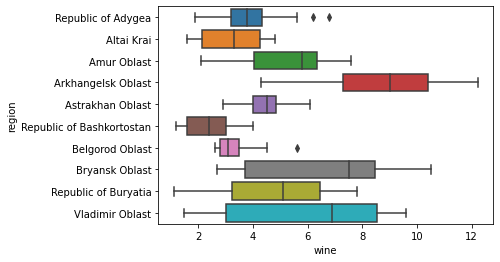

['Volgograd Oblast' 'Vologda Oblast' 'Voronezh Oblast'
 'Republic of Dagestan' 'Jewish Autonomous Oblast' 'Zabaykalsky Krai'
 'Ivanovo Oblast' 'Republic of Ingushetia' 'Irkutsk Oblast'
 'Kabardino-Balkar Republic']


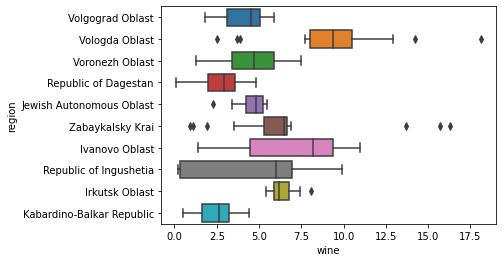

['Kaliningrad Oblast' 'Republic of Kalmykia' 'Kaluga Oblast'
 'Kamchatka Krai' 'Karachay-Cherkess Republic' 'Republic of Karelia'
 'Kemerovo Oblast' 'Kirov Oblast' 'Kostroma Oblast' 'Krasnodar Krai']


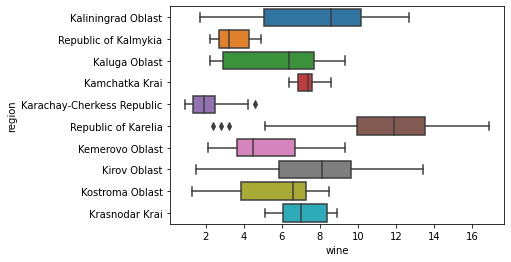

['Krasnoyarsk Krai' 'Republic of Crimea' 'Kurgan Oblast' 'Kursk Oblast'
 'Leningrad Oblast' 'Lipetsk Oblast' 'Magadan Oblast' 'Mari El Republic'
 'Republic of Mordovia' 'Moscow']


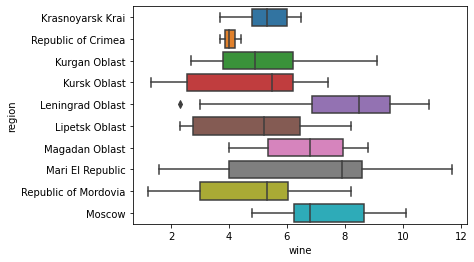

['Moscow Oblast' 'Murmansk Oblast' 'Nenets Autonomous Okrug'
 'Nizhny Novgorod Oblast' 'Novgorod Oblast' 'Novosibirsk Oblast'
 'Omsk Oblast' 'Orenburg Oblast' 'Oryol Oblast' 'Penza Oblast']


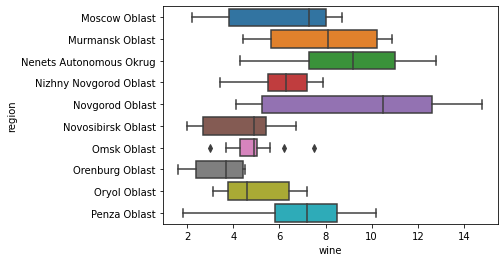

['Perm Krai' 'Primorsky Krai' 'Pskov Oblast' 'Altai Republic'
 'Komi Republic' 'Tuva Republic' 'Rostov Oblast' 'Ryazan Oblast'
 'Samara Oblast' 'Saint Petersburg']


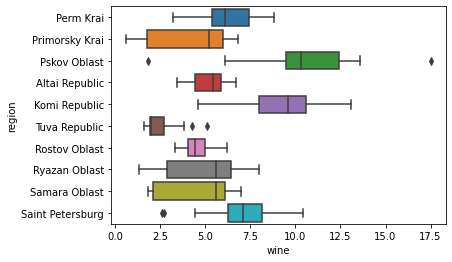

['Saratov Oblast' 'Sakhalin Oblast' 'Sverdlovsk Oblast' 'Sevastopol'
 'Republic of North Ossetia-Alania' 'Smolensk Oblast' 'Stavropol Krai'
 'Tambov Oblast' 'Republic of Tatarstan' 'Tver Oblast']


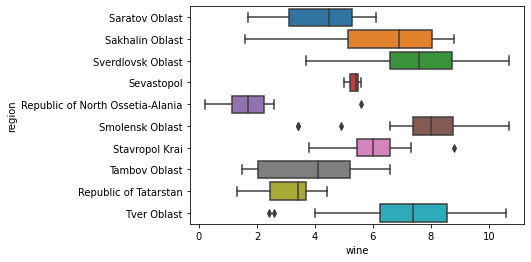

['Tomsk Oblast' 'Tula Oblast' 'Tyumen Oblast' 'Udmurt Republic'
 'Ulyanovsk Oblast' 'Khabarovsk Krai' 'Republic of Khakassia'
 'Khanty–Mansi Autonomous Okrug – Yugra' 'Chelyabinsk Oblast'
 'Chechen Republic']


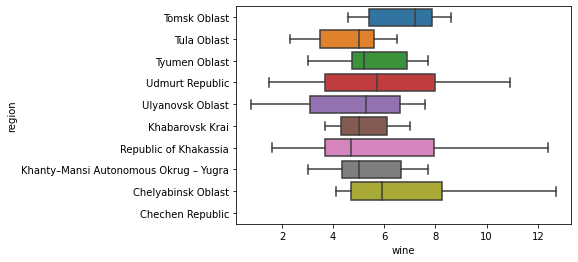

['Chuvash Republic' 'Chukotka Autonomous Okrug' 'Sakha (Yakutia) Republic'
 'Yamalo-Nenets Autonomous Okrug' 'Yaroslavl Oblast']


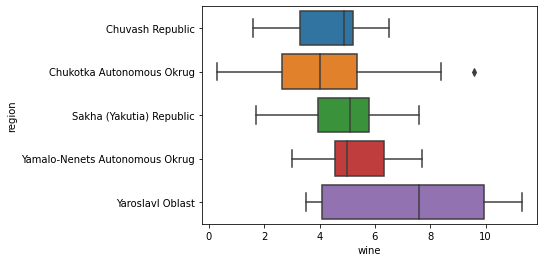

In [14]:
# Segment the target variable by categorical features
columns = df.select_dtypes(include='object').columns.values

column_ranges = list([columns[i:i+3] for i in range(0,len(columns),3)])

print(column_ranges)
for columns in column_ranges:
    for column in columns:
        print(column)
        unique_values = df[column].unique()
        value_ranges = [unique_values[i:i+10] for i in range(0,len(unique_values),10)] 
        for value in value_ranges:
            print(value)
            sns.boxplot(y=column, x='wine', data=df[df[column].isin(value)])
            plt.show()
    